#Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#The Data

In [4]:
train = pd.read_csv('titanic_train.csv')

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#Missing Data

<Axes: >

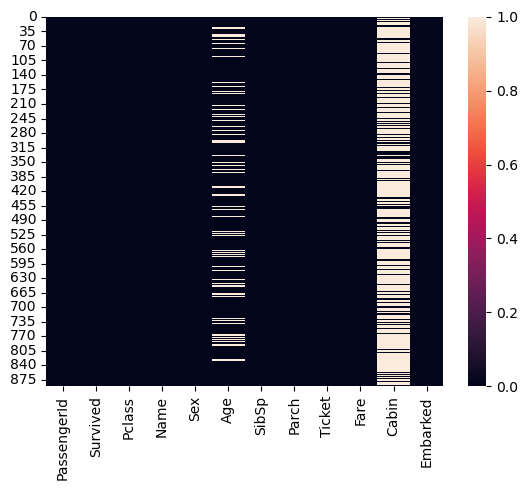

In [8]:
sns.heatmap(train.isnull())

Column Age and Cabin has missing data

<Axes: xlabel='Survived', ylabel='count'>

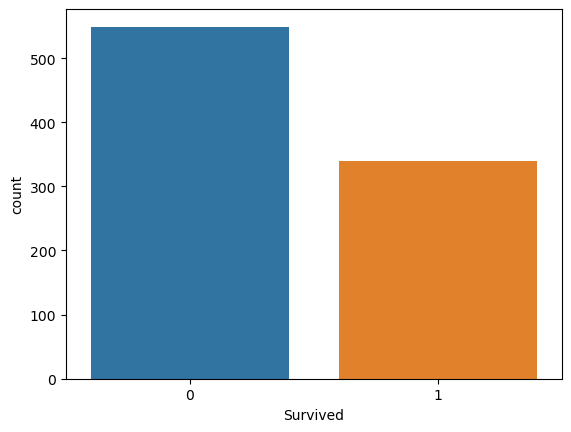

In [94]:
sns.countplot(x= 'Survived',data=train )

<Axes: xlabel='Survived', ylabel='count'>

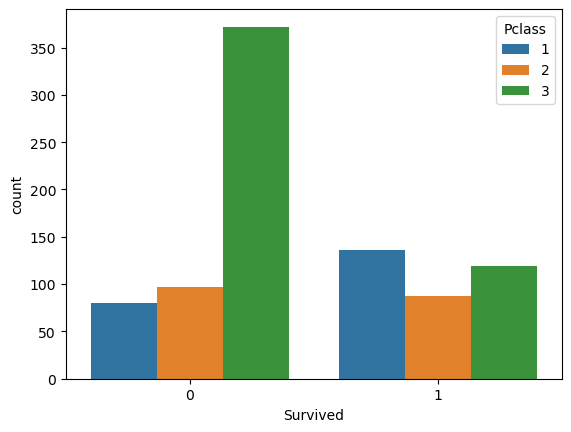

In [30]:
sns.countplot(x='Survived', hue='Pclass', data=train)

C:\Users\Trisna Pramudia\AppData\Local\Temp\ipykernel_2272\1105157706.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = train['Age'].dropna(), bins=30, color='red')


<Axes: ylabel='Density'>

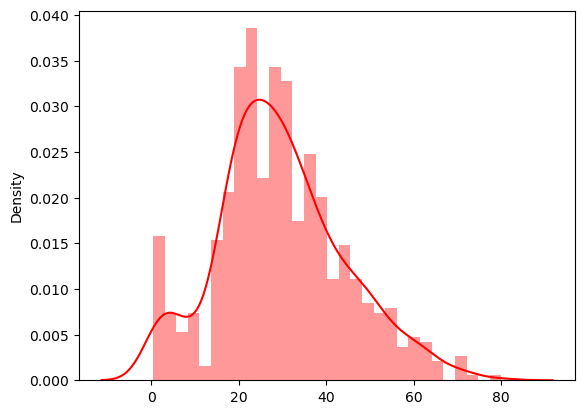

In [32]:
sns.distplot(x = train['Age'].dropna(), bins=30, color='red')

<Axes: xlabel='SibSp', ylabel='count'>

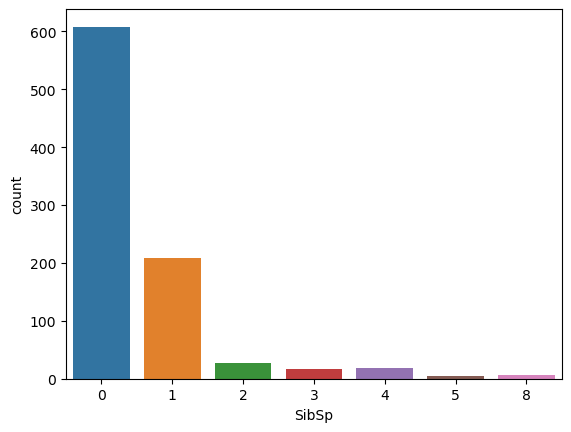

In [34]:
sns.countplot(x='SibSp', data=train)

C:\Users\Trisna Pramudia\AppData\Local\Temp\ipykernel_2272\2693051134.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=train['Fare'],bins=40, kde=False)


<Axes: >

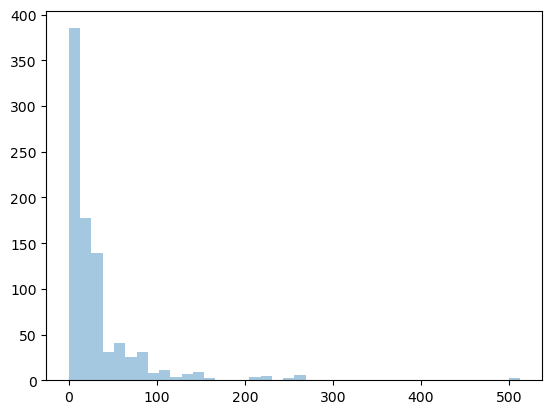

In [36]:
sns.distplot(x=train['Fare'],bins=40, kde=False)

cufflinks for plot

In [38]:
import cufflinks as cf
cf.go_offline()

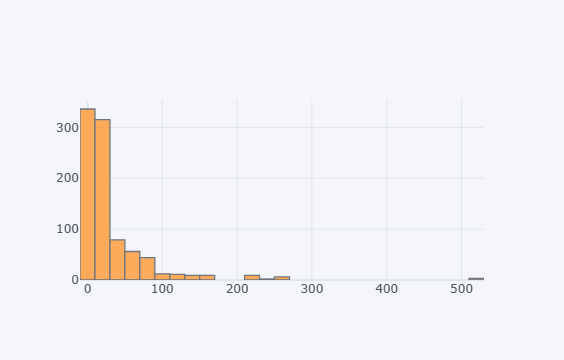

In [39]:
train['Fare'].iplot(kind='hist', bins=50)

#Data Cleaning

find the average age of ticket class

<Axes: xlabel='Pclass', ylabel='Age'>

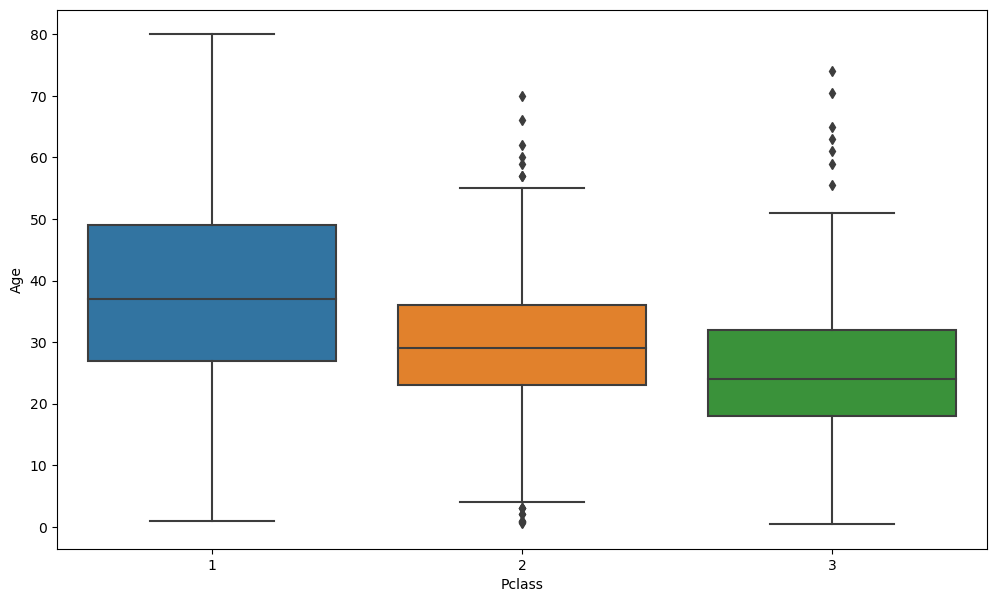

In [42]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train)

we can use the average age of class to fill missing data of column 'Age'

In [44]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [46]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)

<Axes: >

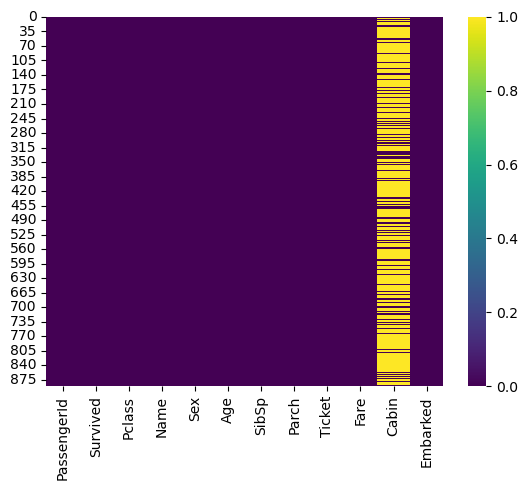

In [48]:
sns.heatmap(train.isnull(), cmap='viridis')

because the cabin has so much missing data, we can drop cabin

In [50]:
train.drop('Cabin', axis=1, inplace=True)

In [52]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<Axes: >

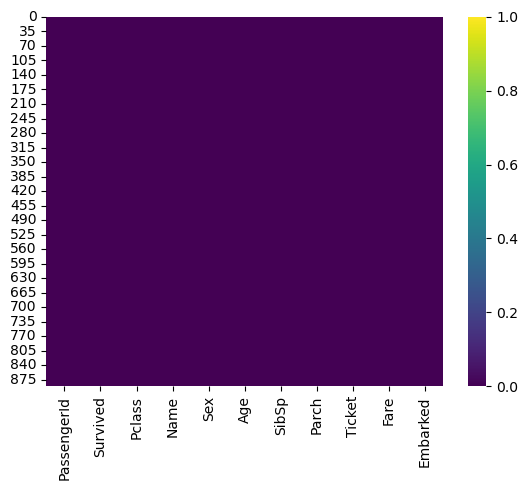

In [54]:
sns.heatmap(train.isnull(), cmap='viridis')

In [56]:
train.dropna(inplace=True) #drop all misising value

#CONVERTING CATEGORICAL FEATURE

change the alue of the string value like sex(Female=0, male=1)

In [58]:
sex =pd.get_dummies(train['Sex'], drop_first=True) #drop_first so we can only have those two values, 1 and 0

In [60]:
embark = pd.get_dummies(train['Embarked'], drop_first=True)

In [62]:
train = pd.concat([train, sex, embark], axis=1) #axis=1 to add 1 new collumn

we don't need Sex and Ebbarked column in train before
we also drop Name and Ticket

In [64]:
train.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)

In [66]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,True


Passenger ID is numerical index so we cant predict surivability based on that, so we drop it

In [68]:
train.drop(['PassengerId'],axis=1, inplace=True)

PClass also has 3 data that can get dummies

Train Test Split

In [99]:
from sklearn.model_selection import train_test_split

In [102]:
x= train.drop('Survived', axis=1) #all collumn except Survived, Survived use as y axis
y= train['Survived']

In [104]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.30, 
                                                    random_state=101)

Training and Predict

In [114]:
from sklearn.linear_model import LogisticRegression

In [116]:
logmodel = LogisticRegression()

In [118]:
logmodel.fit(X_train, y_train)

D:\App\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [120]:
predictions  = logmodel.predict(X_test)

Evaluation

In [126]:
from sklearn.metrics import classification_report

In [128]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       163
           1       0.82      0.71      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.81      0.81       267
weighted avg       0.83      0.83      0.83       267



In [132]:
from sklearn.metrics import confusion_matrix

In [134]:
print(confusion_matrix(y_test, predictions))

[[147  16]
 [ 30  74]]
